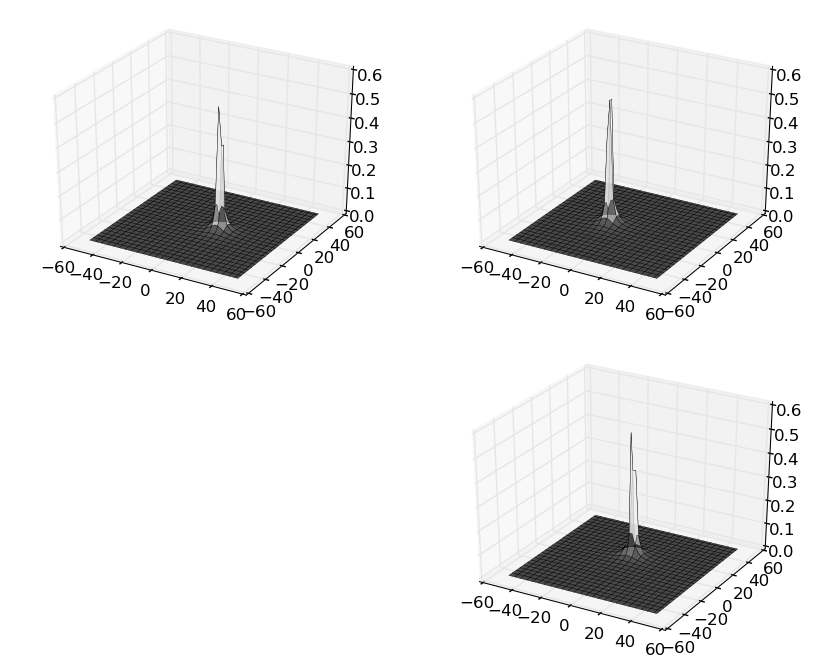

In [33]:
using PyPlot

n = 50
xn = yn = n
x = linspace(-50, 50, xn)
y = linspace(-50, 50, yn)

xgrid = repmat(x, 1, xn)';
ygrid = repmat(y, 1, yn);

type Antenna
    x::Float64
    y::Float64
end

antennas = Antenna[]
push!(antennas, Antenna(0, 10))
push!(antennas, Antenna(0, -10))
push!(antennas, Antenna(10, 0))

fi(a, x, y) = 1 / ((x-antennas[a].x)^2 + (y-antennas[a].y)^2 + 0.2)
flog(a, x, y) = 5-log((x-antennas[a].x)^2 + (y-antennas[a].y + .1)^2)/2

function compute_field(a, xn, yn)
    z = Array(Float64, xn, yn)
    for i in 1:xn
        for j in 1:yn
            z[i, j] = fi(a, x[i], y[j])
        end
    end
    return z
end

fig = figure("An example", figsize=(10,8));
ax = fig[:add_subplot](2,2,1, projection = "3d");
z = compute_field(1,xn,yn)
ax[:plot_surface](xgrid, ygrid, z, rstride=2, cstride=2, cmap=ColorMap("gray"), alpha=0.7, linewidth=0.25)
ax = fig[:add_subplot](2,2,2, projection = "3d");
z = compute_field(2,xn,yn)
ax[:plot_surface](xgrid, ygrid, z, rstride=2, cstride=2, cmap=ColorMap("gray"), alpha=0.7, linewidth=0.25)
ax = fig[:add_subplot](2,2,4, projection = "3d");
z = compute_field(3,xn,yn)
ax[:plot_surface](xgrid, ygrid, z, rstride=2, cstride=2, cmap=ColorMap("gray"), alpha=0.7, linewidth=0.25)
fig[:subplots_adjust](left=.1,right=.9,top=.9,bottom=.1,wspace=.1,hspace=.1);
show();
